In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the raw data (limited to a certain row size for memory reasons)
RAW_DATA_PATH = '../data/raw/'
big_set_path      = RAW_DATA_PATH + 'TCGA-GBM_TCGA-THCA_TCGA-LAML_TCGA-HNSC_TCGA-LUAD_TCGA-UCEC_TCGA-KIRC_TCGA-SARC__GeneExpressionQuantification_TP_TB_HTSeq-Counts.csv'
big_set_meta_path = RAW_DATA_PATH + 'TCGA-GBM_TCGA-THCA_TCGA-LAML_TCGA-HNSC_TCGA-LUAD_TCGA-UCEC_TCGA-KIRC_TCGA-SARC__GeneExpressionQuantification_TP_TB_HTSeq-Counts_metadata.csv'
small_set_path = RAW_DATA_PATH + 'TCGA-LUAD__GeneExpressionQuantification_TP_HTSeq-Counts.csv'

big_df_meta = pd.read_csv(big_set_meta_path)
big_df = pd.read_csv(big_set_path)
old_columns = big_df.columns.values
old_columns[0] = "sample_id"
big_df.columns = old_columns
big_df = big_df.set_index('sample_id')

In [3]:
big_df.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281881,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-32-1970-01A-01R-1850-01,11.486682,4.595794,9.402014,8.912463,8.198456,8.719854,10.418444,10.921952,11.311891,10.245935,...,5.038474,2.659312,2.659312,5.731262,4.229173,4.076120,3.548093,2.659312,7.173173,4.541836
TCGA-28-2499-01A-01R-1850-01,13.332473,4.045700,10.112889,8.759987,7.647030,8.554376,11.957435,10.975277,10.467500,10.118737,...,4.292284,2.659312,2.659312,5.124270,4.215908,3.200535,3.420358,2.659312,6.993938,4.774431
TCGA-06-2567-01A-01R-1849-01,11.521858,4.325851,9.766619,9.189010,8.922481,9.328744,10.439428,10.976894,12.042623,10.584542,...,3.493483,3.145356,3.145356,5.828067,4.537369,3.343507,3.618253,2.659312,7.689498,3.726769
TCGA-26-5139-01A-01R-1850-01,12.208666,4.051628,9.934487,8.989363,8.034191,8.851534,11.311676,11.547412,10.578954,10.078325,...,4.503140,3.202997,2.659312,5.313769,3.728491,2.659312,2.659312,2.659312,6.374439,4.299084
TCGA-14-0790-01B-01R-1849-01,12.157053,4.547998,9.974410,9.028864,8.206714,7.630455,11.140466,11.743081,10.916893,9.979763,...,6.090391,3.902177,2.659312,4.628288,3.902177,2.659312,2.659312,2.659312,6.580874,4.369875


In [4]:
big_df_meta

,Unnamed: 0,TCGA-32-1970-01A-01R-1850-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-2567-01A-01R-1849-01,TCGA-26-5139-01A-01R-1850-01,TCGA-14-0790-01B-01R-1849-01,TCGA-06-0174-01A-01R-1849-01,TCGA-06-0744-01A-01R-1849-01,TCGA-41-4097-01A-01R-1850-01,TCGA-32-2638-01A-01R-1850-01,...,TCGA-DX-A48U-01A-11R-A30C-07,TCGA-MB-A8JK-01A-11R-A36F-07,TCGA-VT-AB3D-01A-12R-A41I-07,TCGA-DX-AB2L-01A-32R-A41I-07,TCGA-MJ-A68H-01A-11R-A30C-07,TCGA-DX-A6YX-01A-11R-A41I-07,TCGA-IE-A6BZ-01A-11R-A30C-07,TCGA-FX-A48G-01A-11R-A24X-07,TCGA-DX-A7EI-01A-11R-A33J-07,TCGA-DX-A48R-01A-11R-A30C-07
0,project_id,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,TCGA-GBM,...,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC,TCGA-SARC
1,shortLetterCode,TP,TP,TP,TP,TP,TP,TP,TP,TP,...,TP,TP,TP,TP,TP,TP,TP,TP,TP,TP


In [5]:
# Retrieve the cancer types for each record in the big DataFrame
big_df.dropna(axis=(0, 1), inplace=True)
labels_true = []
for sample_id in big_df.index:
    cancer_type = big_df_meta[sample_id][0]
    if "TCGA" in str(cancer_type):
        labels_true.append(cancer_type)
    else:
        # Remove measurement from big_df that has no valid cancer type
        big_df.drop(index=sample_id, inplace=True)

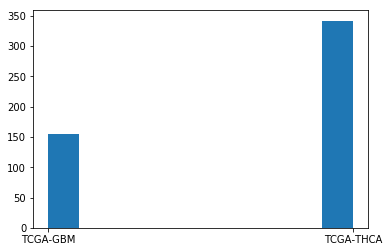

In [6]:
plt.hist(labels_true)
plt.show()

In [7]:
# Feature Selection
def select_variance_features(df, threshold=20):
    columns = big_df.columns
    selector = VarianceThreshold(threshold=threshold)
    selector.fit_transform(big_df)
    labels = [columns[x] for x in selector.get_support(indices=True) if x]
    return pd.DataFrame(selector.fit_transform(big_df), columns=labels)

def scale_df(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return pd.DataFrame(df_scaled, columns=df.columns)

X = select_variance_features(big_df)
X = scale_df(X)
X.head()

,ENSG00000009765,ENSG00000042832,ENSG00000087250,ENSG00000100427,ENSG00000106278,ENSG00000115705,ENSG00000123560,ENSG00000125462,ENSG00000129824,ENSG00000130287,...,ENSG00000140279,ENSG00000147588,ENSG00000157765,ENSG00000164434,ENSG00000168878,ENSG00000169550,ENSG00000170421,ENSG00000178919,ENSG00000181449,ENSG00000229415
0,-1.250772,-1.431129,1.714267,1.609772,1.539567,-1.287903,1.130187,1.565283,1.126421,1.809685,...,-1.468988,1.401810,-1.491466,1.429874,-1.177836,-1.492674,-1.640716,-1.577954,1.507979,-1.370259
1,-1.412900,-1.554855,1.780163,1.524660,1.432156,-1.426565,1.207220,1.271749,1.294950,1.001712,...,-1.455975,0.942322,-0.941989,1.442026,-1.217075,-1.492674,-1.337315,-1.577954,1.539947,-1.158628
2,-1.252322,-1.354934,1.252028,1.497725,1.425988,-1.296501,1.642933,1.575081,1.168197,1.582393,...,-1.376779,1.537206,-1.118112,0.773104,-1.140833,-1.492674,-1.380186,-1.577954,1.594552,-1.183950
3,-1.513116,-1.413607,1.498847,1.803670,1.648669,-1.426565,1.265155,1.459542,-0.151303,1.799942,...,-1.408135,1.553463,-0.723644,1.847766,-1.216301,-1.377187,-1.574269,-1.465445,1.523365,-1.568757
4,-1.395411,-1.428486,1.690281,1.927539,1.560184,-1.256999,1.132091,1.504037,-0.183752,2.158920,...,-1.403135,1.559899,-1.397471,1.928821,-1.223625,-1.492674,-1.457235,-1.577954,1.546197,-1.426787


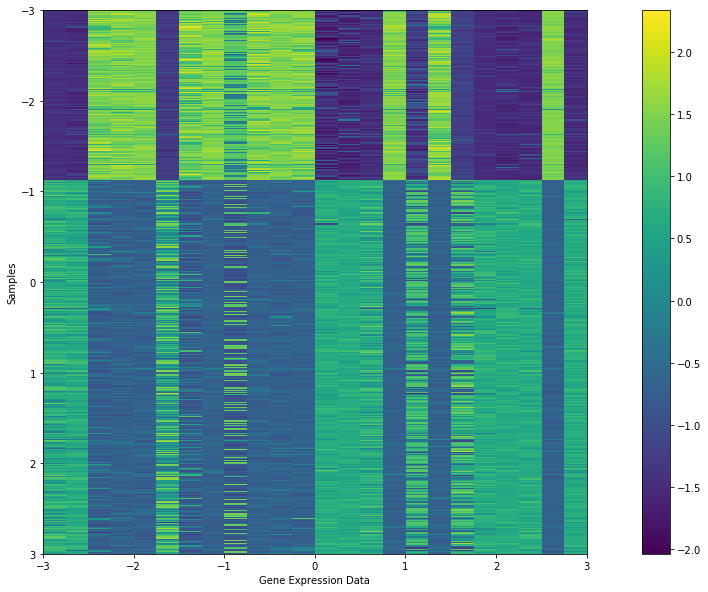

In [8]:
plt.figure(figsize=(20,10))
im = plt.imshow(X, extent=(-3, 3, 3, -3))
plt.ylabel("Samples")
plt.xlabel("Gene Expression Data")
plt.colorbar(im)
plt.show()

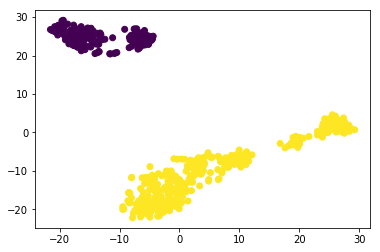

In [9]:
# Plot the scaled features using t-SNE
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[list(set(labels_true)).index(x) for x in labels_true])
plt.show()

In [10]:
# Clustering
# Compute DBSCAN
db = DBSCAN(eps=5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Evaluation
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Apparently DBSCAN was able to separate the gene expression data perfectly with respect to the cancer type.

Estimated number of clusters: 2
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.784


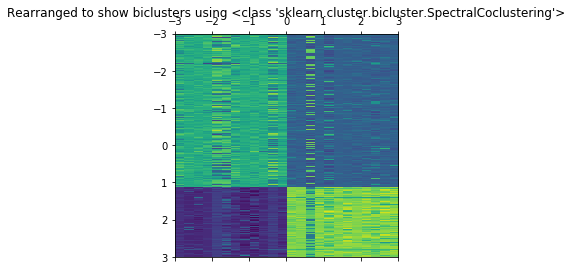

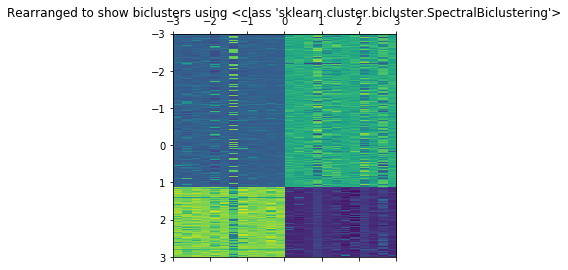

In [11]:
# Bi-Clustering using Spectral Co-Clustering and Spectral Bi-Clustering
models = [SpectralCoclustering(n_clusters=2), SpectralBiclustering(n_clusters=2)]
for model in models:
    model.fit(X)
    fit_data = X.values[np.argsort(model.row_labels_)]
    fit_data = fit_data[:, np.argsort(model.column_labels_)]
    plt.matshow(fit_data, extent=(-3, 3, 3, -3))
    plt.title("Rearranged to show biclusters using " + str(model.__class__))
    plt.show()